# PHAS0029 C9: Fourier Transform - assignment

In [1]:
#%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import scipy.io.wavfile as wave

# Part 1: Transforms of basic functions

### Task 1: A step function
<div class="alert alert-success">

Generate and plot a square-wave with $f(x) = +1$ for $0 \leq x < 0.5$ and $-1$ for $0.5 \leq x < 1$, over a single period.  (n.b. you *don't* need to write this as a Python function), sampled at $N = 1000$ evenly spaced points, and calculate and plot its Fourier coefficients. Use either FFT or the DFT function we created.
    
Comment briefly on the results - are they what you expected? Refer to the standard results you know from PHAS0025 (MMIII).

<i>Hint: Note that, unlike in session 7 where we needed the wave in the form of a function, this can be done simply in a line or two of code. You just need a 1000-element array with every element = +1 for the first half and -1 for the second half.</i>    
</div>

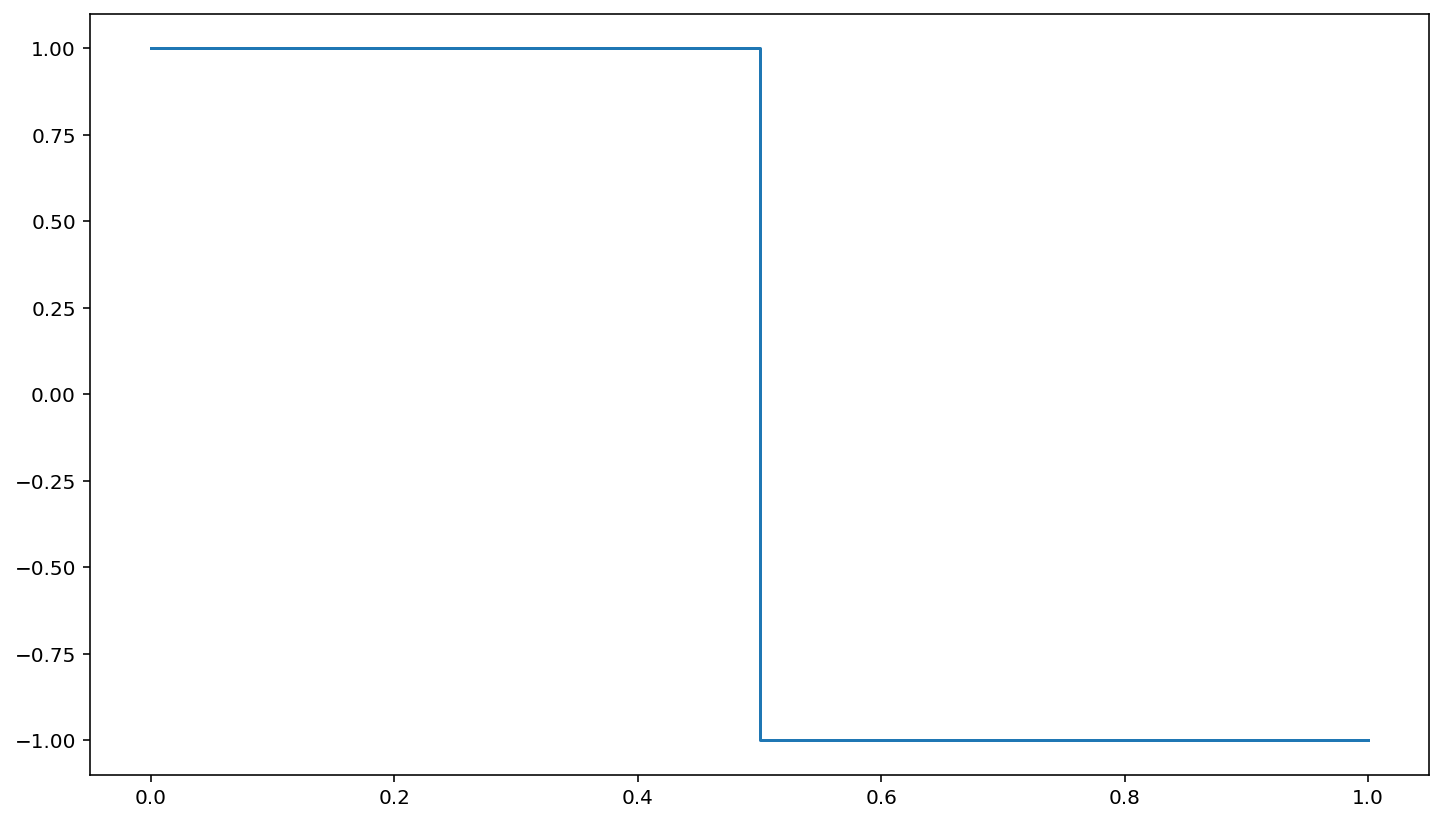

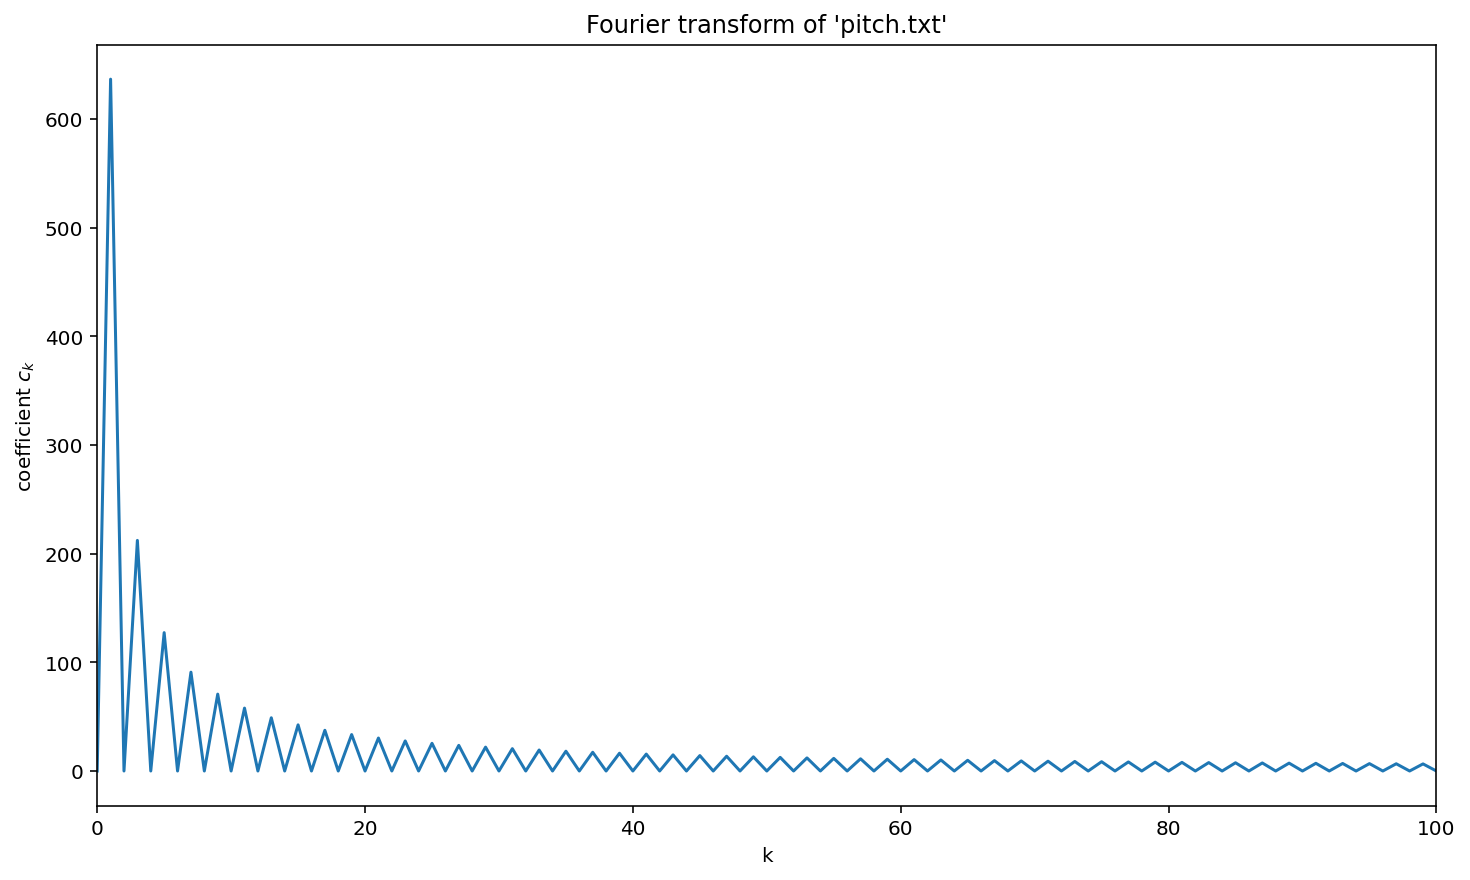

In [2]:
# generating values of f(x)=+1 for 0 =< x < 0.5
f_positive = np.ones(500)
x1 = np.linspace(0,0.5,500)

#generating values of f(x)=-1 for 0.5=< x < 1
f_negative = -np.ones(500)
x2 = np.linspace(0.5,1,500)

#putting the two sets of individual functions (i.e. 'f_positive' and 'f_negative') together.
f = np.concatenate((f_positive, f_negative))
x = np.concatenate((x1,x2))

#plotting my square-wave
plt.plot(x,f)


c_fft = np.fft.rfft(f) # transform the original data
                       # note the form of the call -
                       # we're using the numpy rfft routine in the numpy fft submodule

plt.figure()
plt.xlim(0,100)
plt.plot(abs(c_fft))   # plot the absolute coefficients

#title of plot
plt.title("Fourier transform of 'pitch.txt'")
#x-axis label
plt.xlabel('k')
#y-axis label
plt.ylabel('coefficient $c_k$');

From our plot of the fourier coefficients we can see that for even values of k, the fourier coefficients are zero. Which means only odd values of k contribute to the fourier coefficients. 

This is congruent with the standard results we know from MM3 -- i.e. only the sin term contributes and not the cosine term.

### Task 2: A single pulse
<div class="alert alert-success">
    Repeat the task above for a single square pulse defined over the region $0\leq x \leq 1000$, with $f(x) = +1$ for $0 \leq x \leq 10$ and zero elsewhere. In this case you should plot the real part of the coefficients rather than their absolute value. The real part of a complex number c are given by <code> c.real</code> (correspondingly, the imaginary parts are <code>c.imag</code>)


</div>


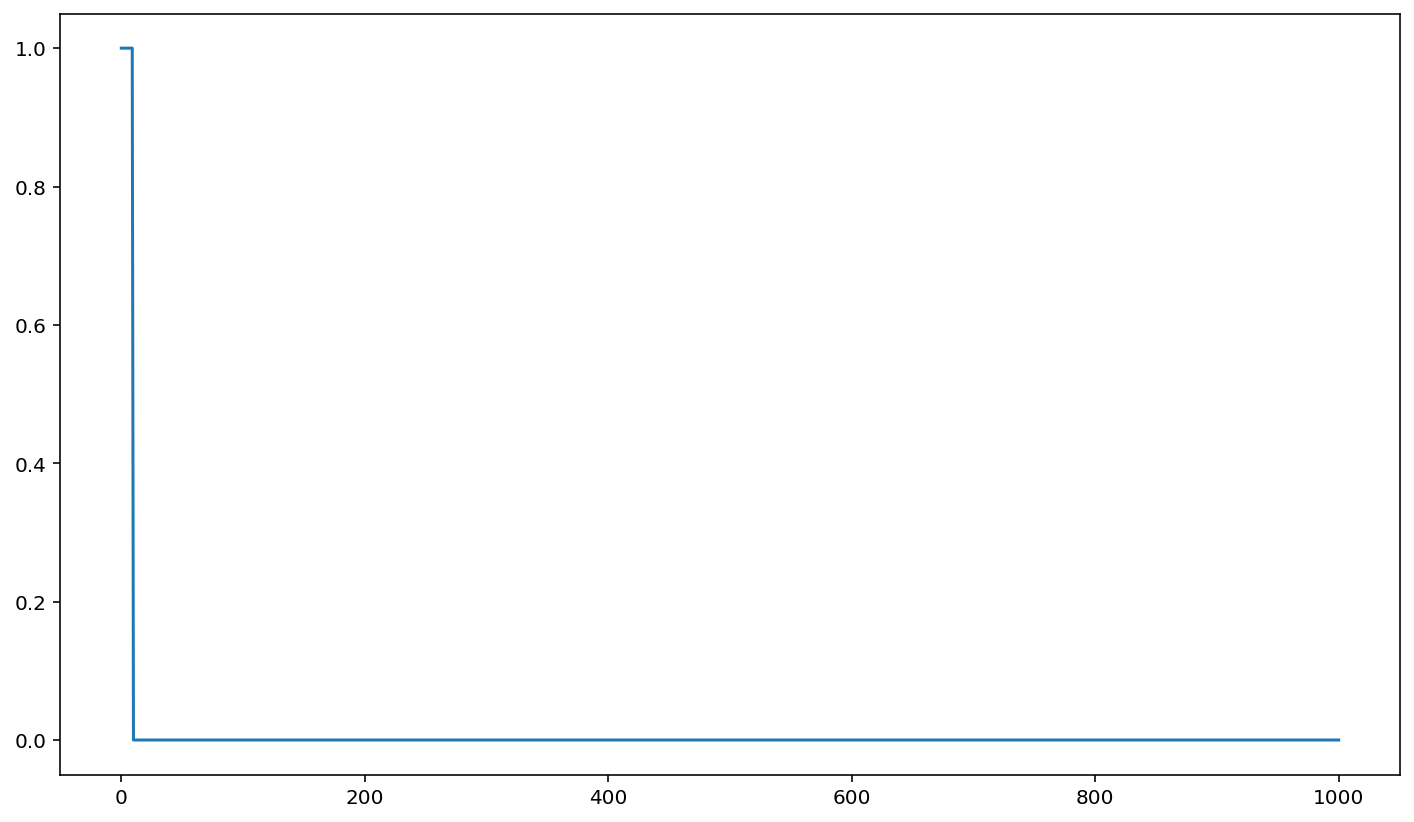

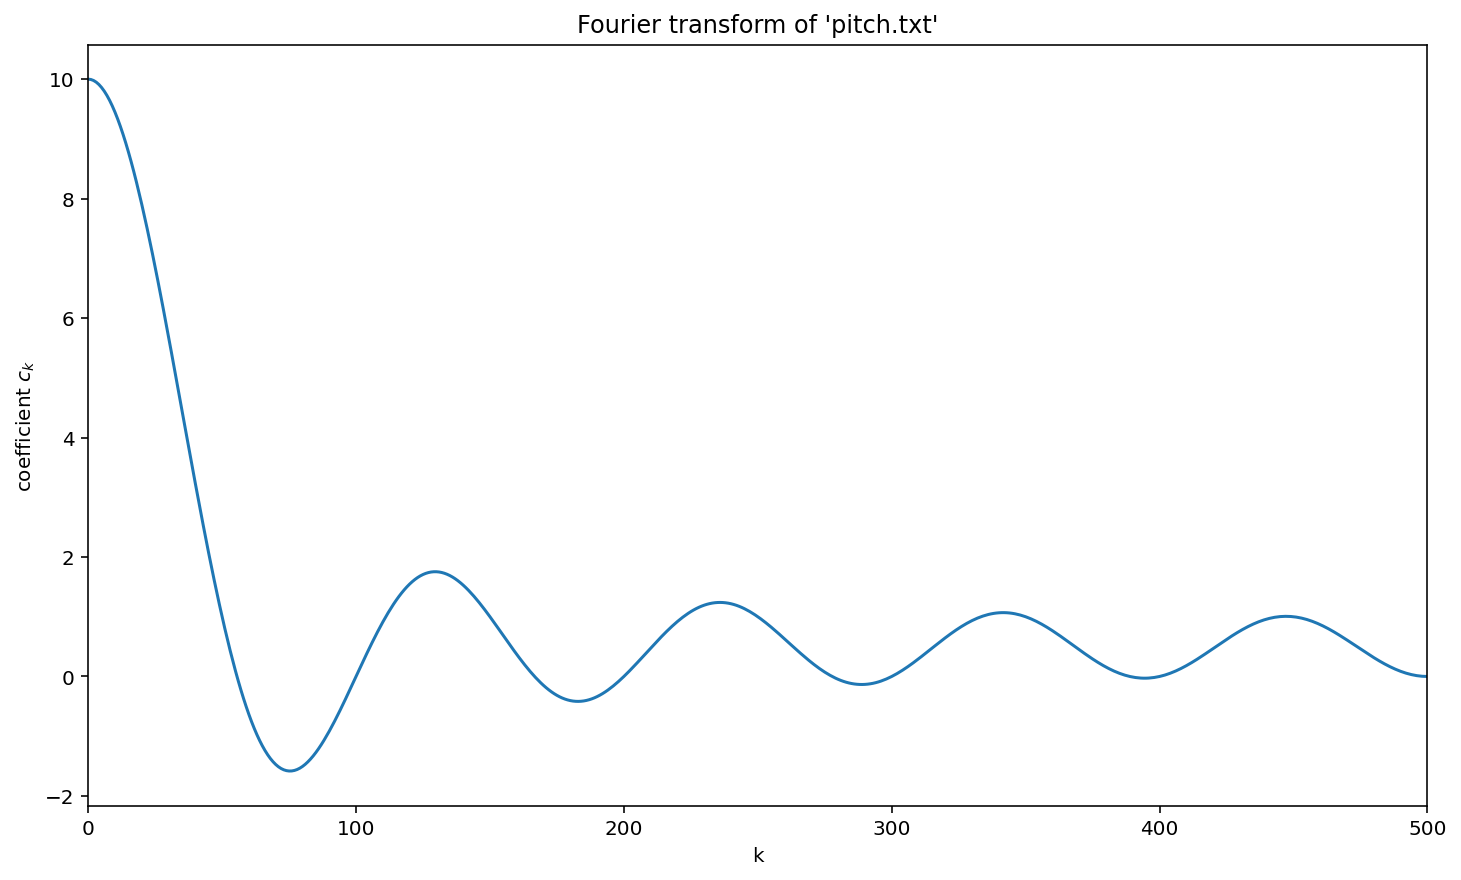

In [3]:
# generating values of f(x)=+1 for 0 =< x < 10
f_ones = np.ones(10)

#generating values of f(x)=0 for 10=< x < 1000
f_zero = np.zeros(990)

#putting the two sets of individual functions (i.e. 'f_ones' and 'f_zero') together.
f1 = np.concatenate((f_ones, f_zero))
x1 = np.linspace(0,1000,1000)

#plotting my square-wave
plt.plot(x1,f1)

c_fft1 = np.fft.rfft(f1) # transform the original data
                       # note the form of the call -
                       # we're using the numpy rfft routine in the numpy fft submodule

plt.figure()
plt.xlim(0,500)
plt.plot(c_fft1.real)   # plot the absolute coefficients

#title of plot
plt.title("Fourier transform of 'pitch.txt'")
#x-axis label
plt.xlabel('k')
#y-axis label
plt.ylabel('coefficient $c_k$');

### Task 3: Theory vs. result
<div class="alert alert-success">
Plot your transformed square pulse and the corresponding mathematical function on the same plot. Explain the result supporting your reasoning with appropriate calculation and plot.
</div>

/tmp/ipykernel_4203/2094000969.py:9: RuntimeWarning: invalid value encountered in true_divide
  y = (200*np.sin(0.05*x2))/x2


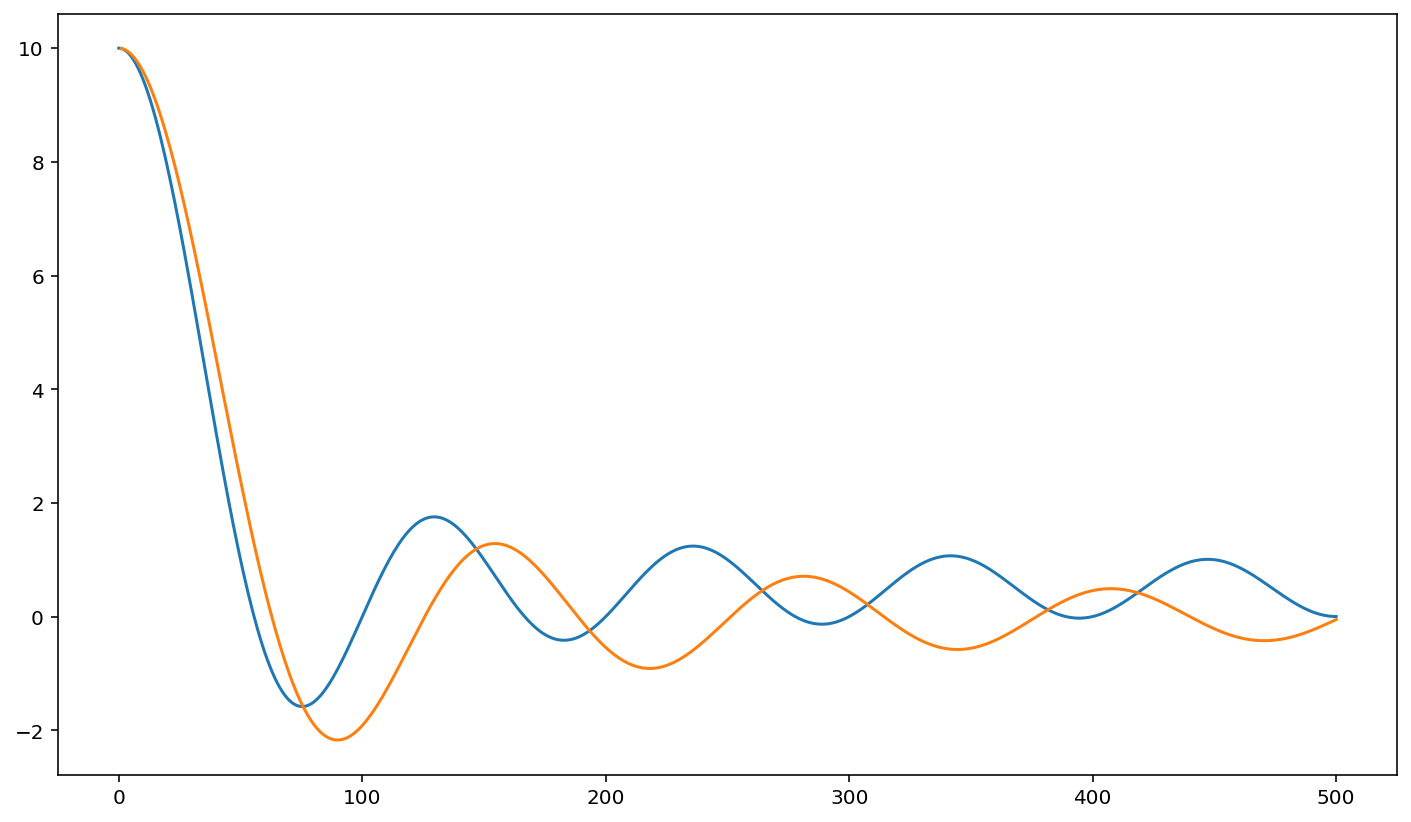

In [10]:
plt.figure()

#plotting the transformed square pulse
plt.plot(c_fft1.real)

x2 = np.linspace(0,500,500)

#corresponding mathematical function
y = (200*np.sin(0.05*x2))/x2

#plotting the corresponding mathematical function
plt.plot(x2,y)

# Part 2: Analysing audio samples

### Task 4
<div class="alert alert-success">
    For this section, you have a selection of audio files from which you should choose two to analyse. These files consist of digital samples of musical instruments playing a single note, <b>recorded at a sampling rate of 44.1 kHz.</b>
    
Write a function called <code>load_data</code> that loads and analyses a short audio sample using Fourier Transform. Your function should take in a file name as an input and:
    - load the data set stored in that file
    - plot the first 2000 points only of the data set
    - on a separate plot, plot a sub-sample of the data every 500th point
    - return the loaded data as an array

In [11]:
def load_data(file):
    '''
    This function loads and analyses a short audio sample using fourier transform. 
    It also plots the first 2000 points of the data set and then plots a sample of the data every 500th point, each on a separate plot.
    
    Input: filename [file]
    Output: the loaded data stored in 'file' [sampledata]
    '''
    
    sampledata = np.loadtxt(file) #loading the data set stored in 'file'
    
    sampledata_2000 = sampledata[0:1999] #retrieving the first 2000 points of the data set 
    
    plt.figure()
    plt.plot(sampledata_2000)   # plotting the first 2000 points of the data set 
            
    #title of plot
    plt.title("First 2000 points of sample dataset")
            
 
    plt.figure()
    #sample of the data every 500th point 
    sampledata_500th = sampledata[::500]
    
    plt.plot(sampledata_500th)   # plotting sample of the data every 500th point
    
    #title of plot
    plt.title("Sample of the data every 500th point")

    
    #returning the loaded data as an array
    return np.array(sampledata)
    

************
 Well done! All test passed. You can move to the next part of the task.
************


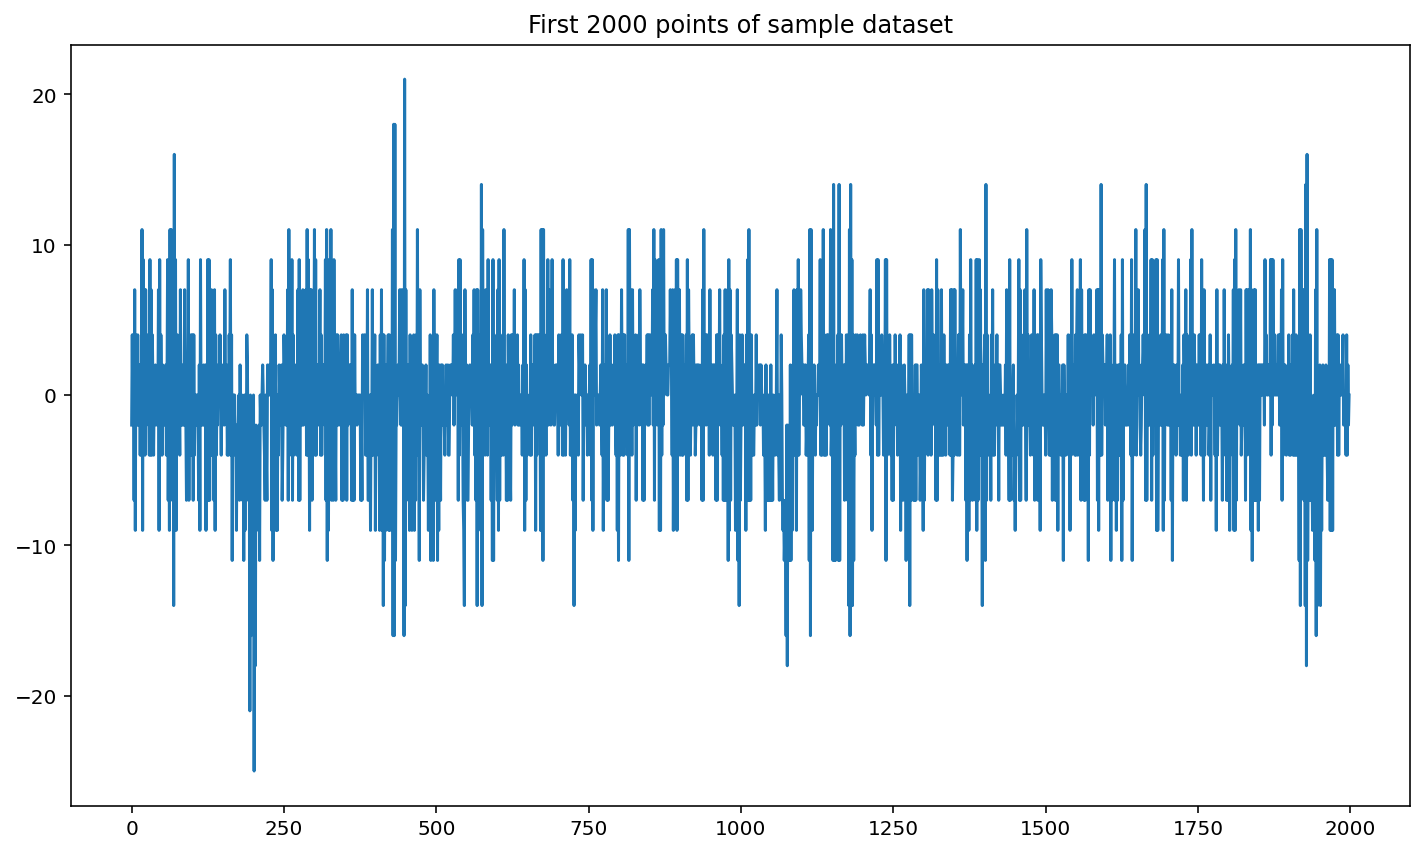

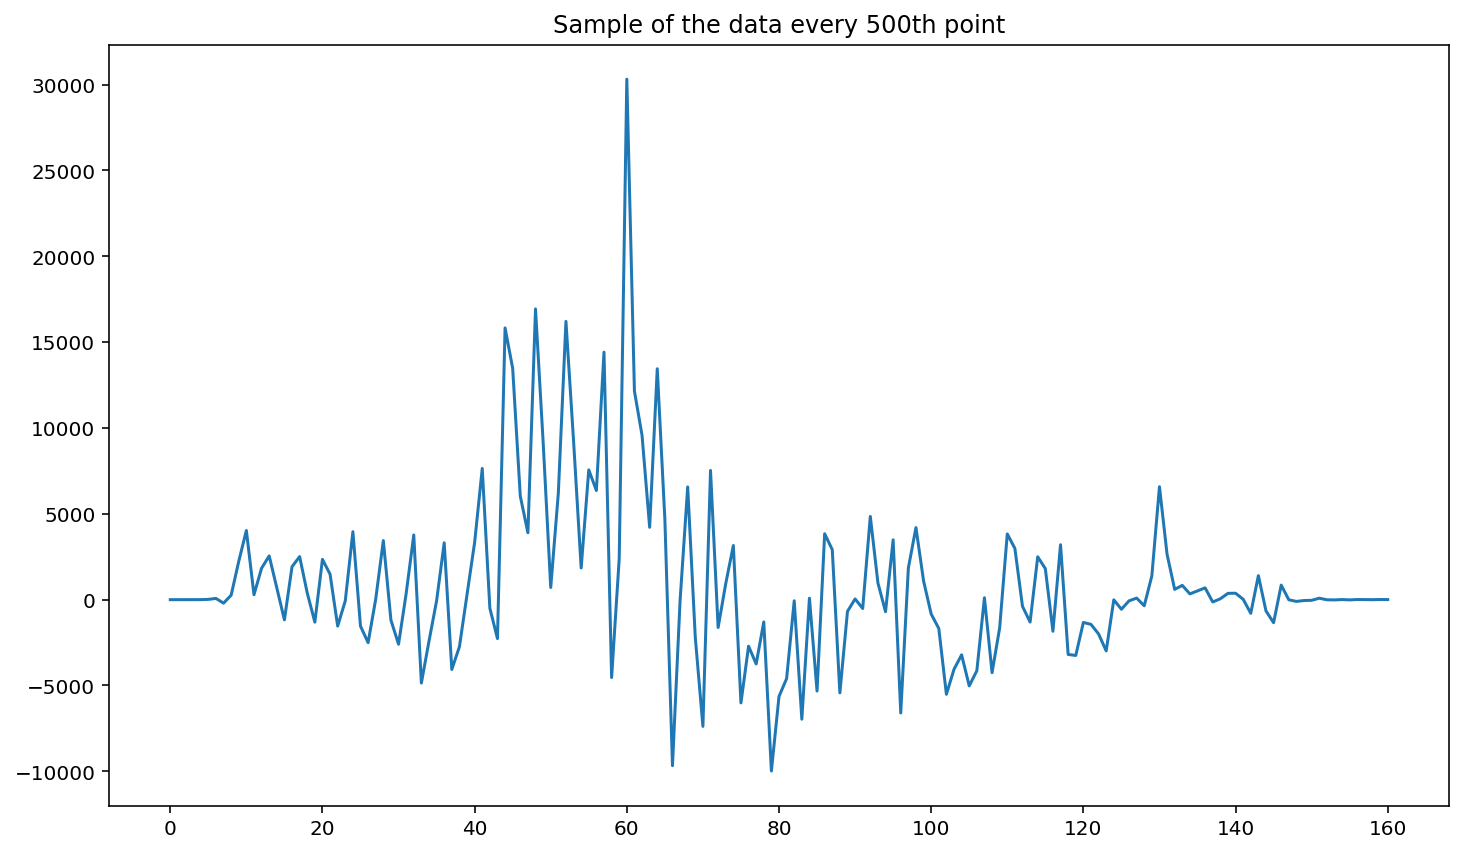

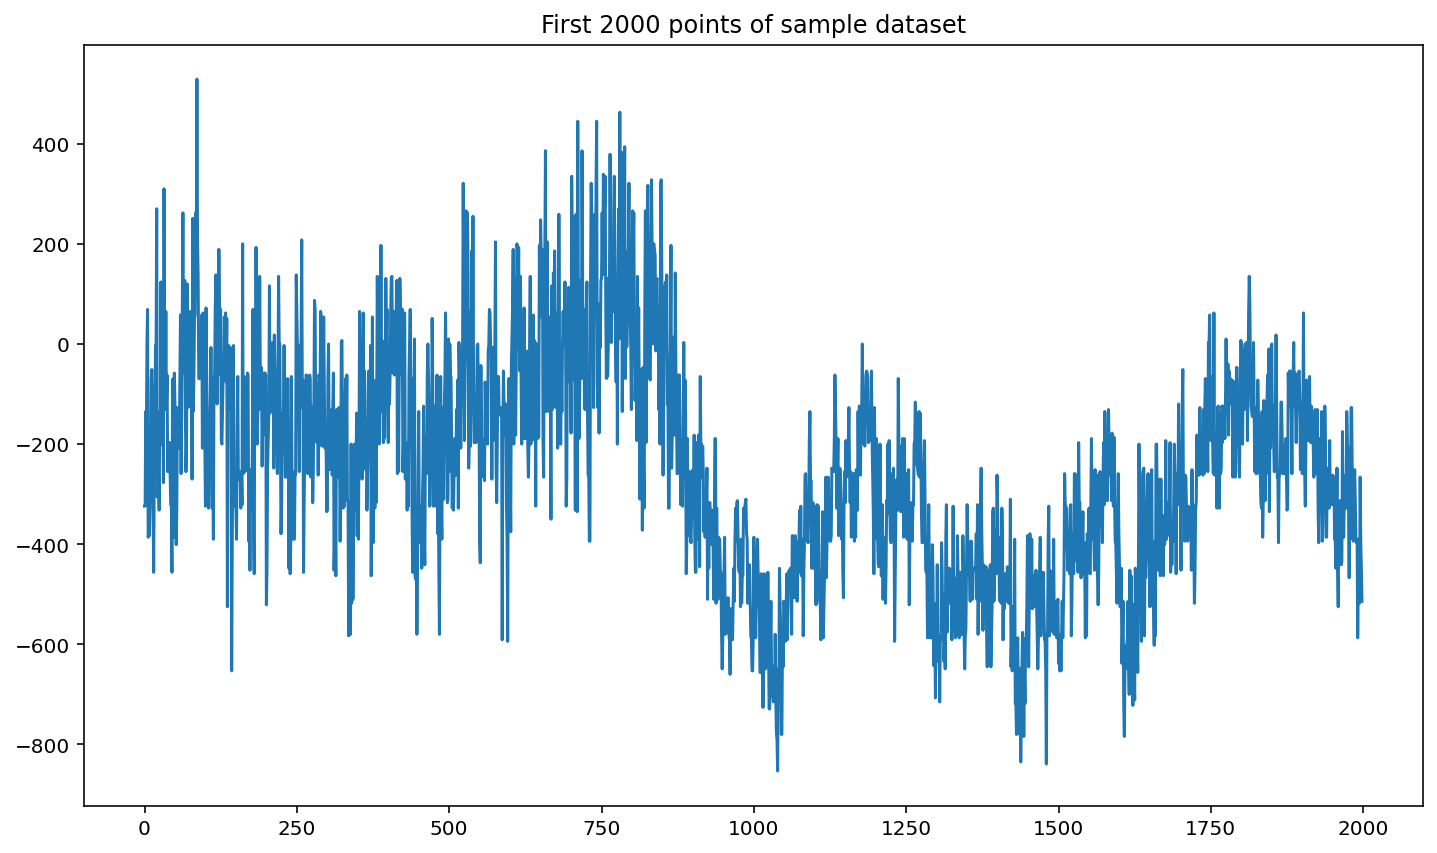

In [12]:
%run -i c10checkpoint1.py

### Task 5
<div class="alert alert-success">
Write a function called <code>analyse</code> which takes in a data array and uses FFT to calculate the discrete Fourier Transform of an audio sample then plot the first 10,000 coefficients. Your function should take two arguments: the data array and a label for the plot (a string) and return all FT coefficients.
</div>

In [13]:
def analyse(data, plotlabel):
    '''
    This function takes in a data array and uses FFT to calculate the discrete Fourier Transform of an audio sample the plot the first 10,000 coefficients.
    
    Input: the data array [data], a label for the plot (of type string) [plotlabel]
    Output: all of the FT coefficients [c_fft]
    '''
    
    c_fft = np.fft.rfft(data)  # transform the data
                               # we're using the numpy rfft routine in the numpy fft submodule
    plt.figure()
    plt.xlim(0,10000)
    plt.plot(abs(c_fft))   # plot the first 10,000 coefficients
    
    #title of plot
    plt.title(plotlabel)
    
    #x-axis label
    plt.xlabel('k')
    #y-axis label
    plt.ylabel('coefficient $c_k$');
    
    #return all FT coefficients
    return c_fft
    

************
 Well done! All test passed. You can move to the next part of the task.
************


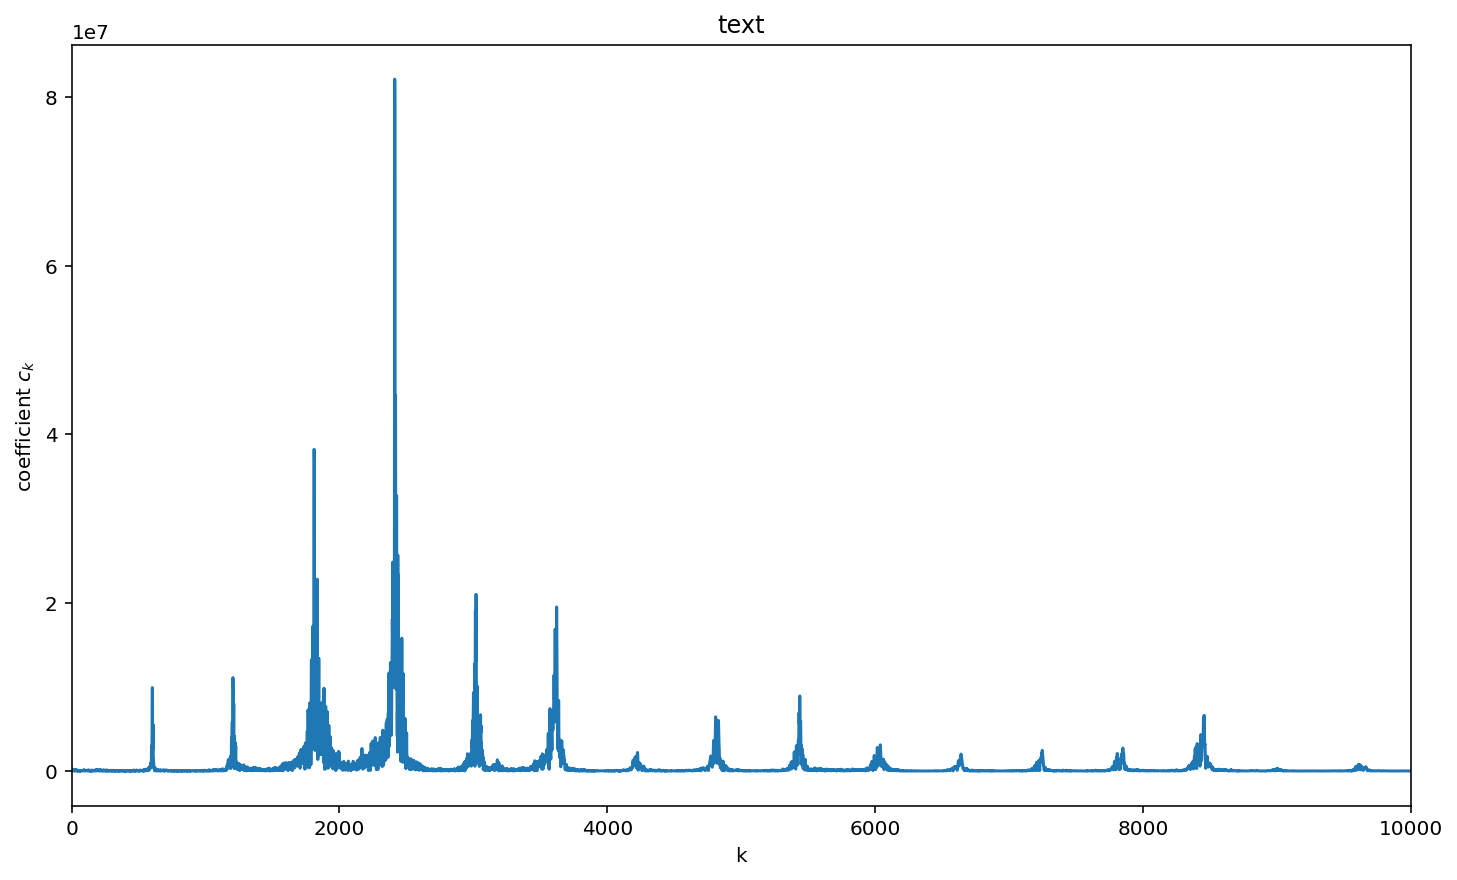

In [14]:
%run -i c10checkpoint2.py

### Task 6
<div class="alert alert-success">
    Using your functions above, analyse <b>two</b> audio samples saved in your directory. For each sample:
<ul>
    <li>identify the fundamental's Fourier coefficient index $k$. (Remember - the fundamental is not necessarily the largest peak!) </li>
    <li>use text cells to make at least three sensible observations of the characteristics you observe in your plots.</li>
    <li>determine what note did the instrument play? Give your answer in Hz - musicians are encouraged to also give the name of the note!</li>
    </ul><br>
    <i>Hint: The frequency $f$ is related to the Fourier coefficient index $k$ by $ f = \frac{\nu k}{N}, $where $\nu$ is the sampling rate and $N$ the total number of sampled data points.</i>
</div>

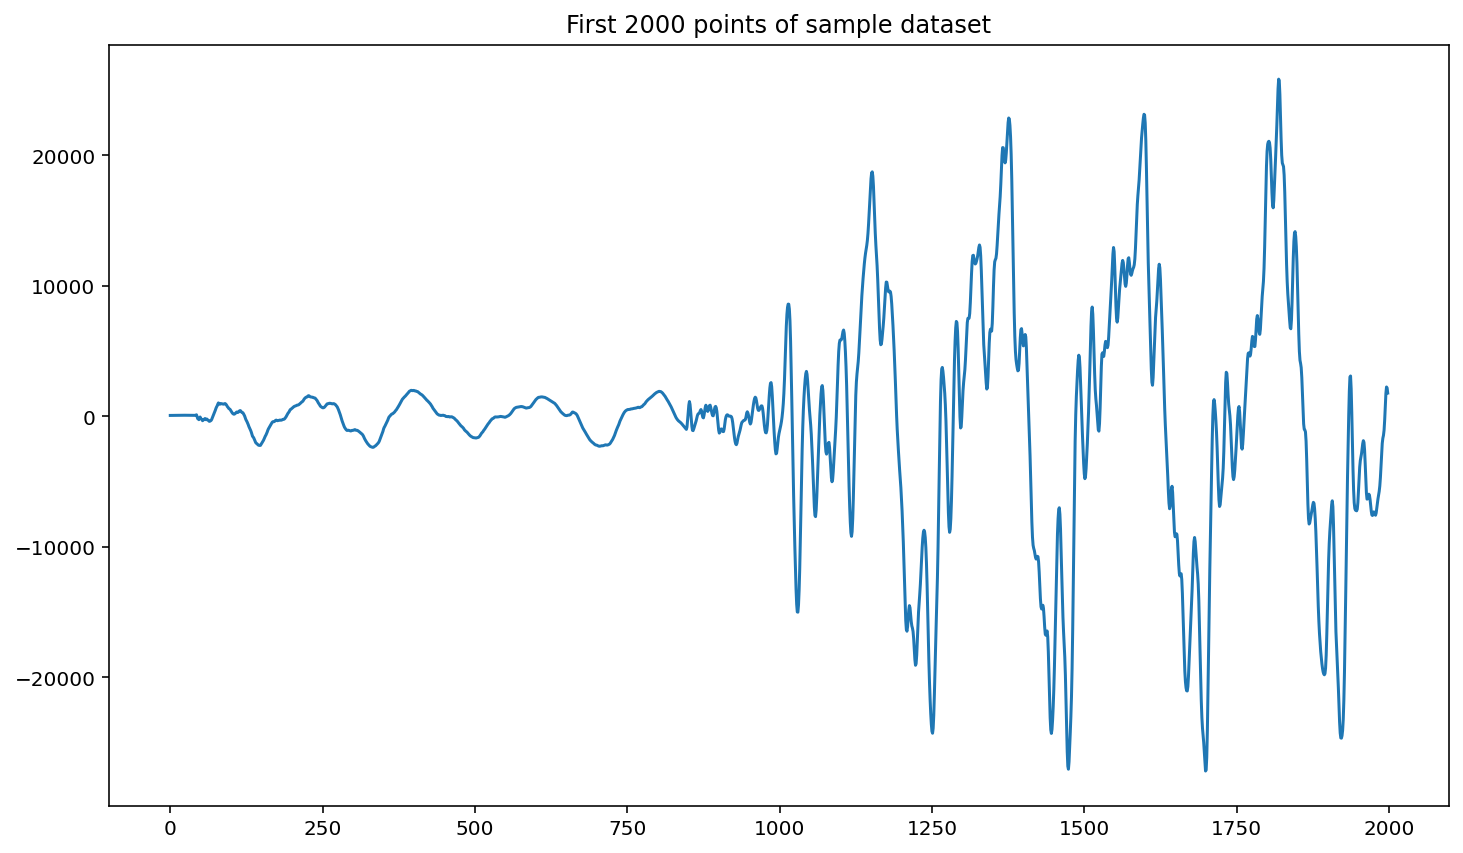

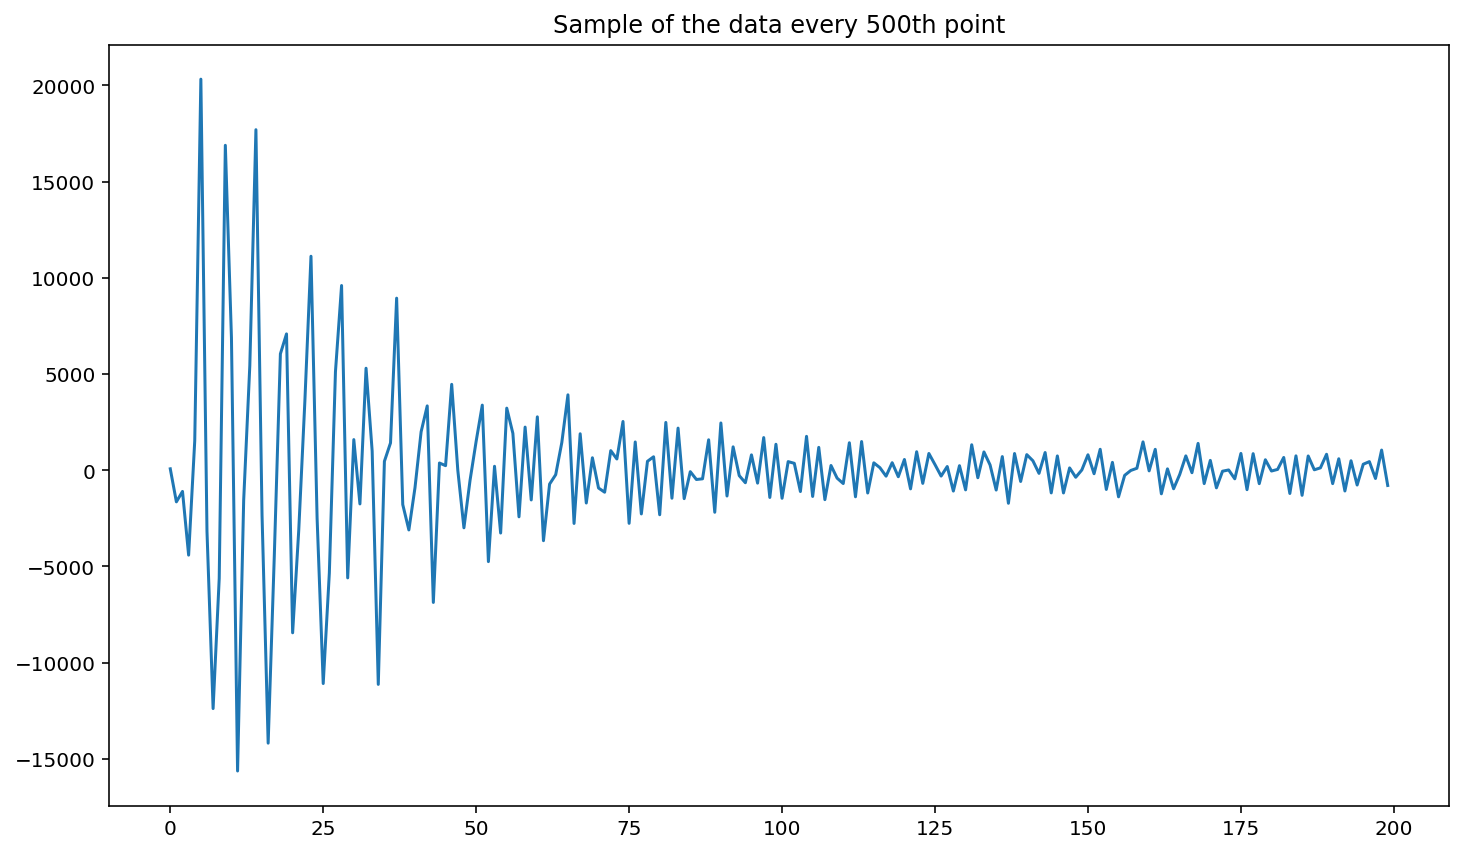

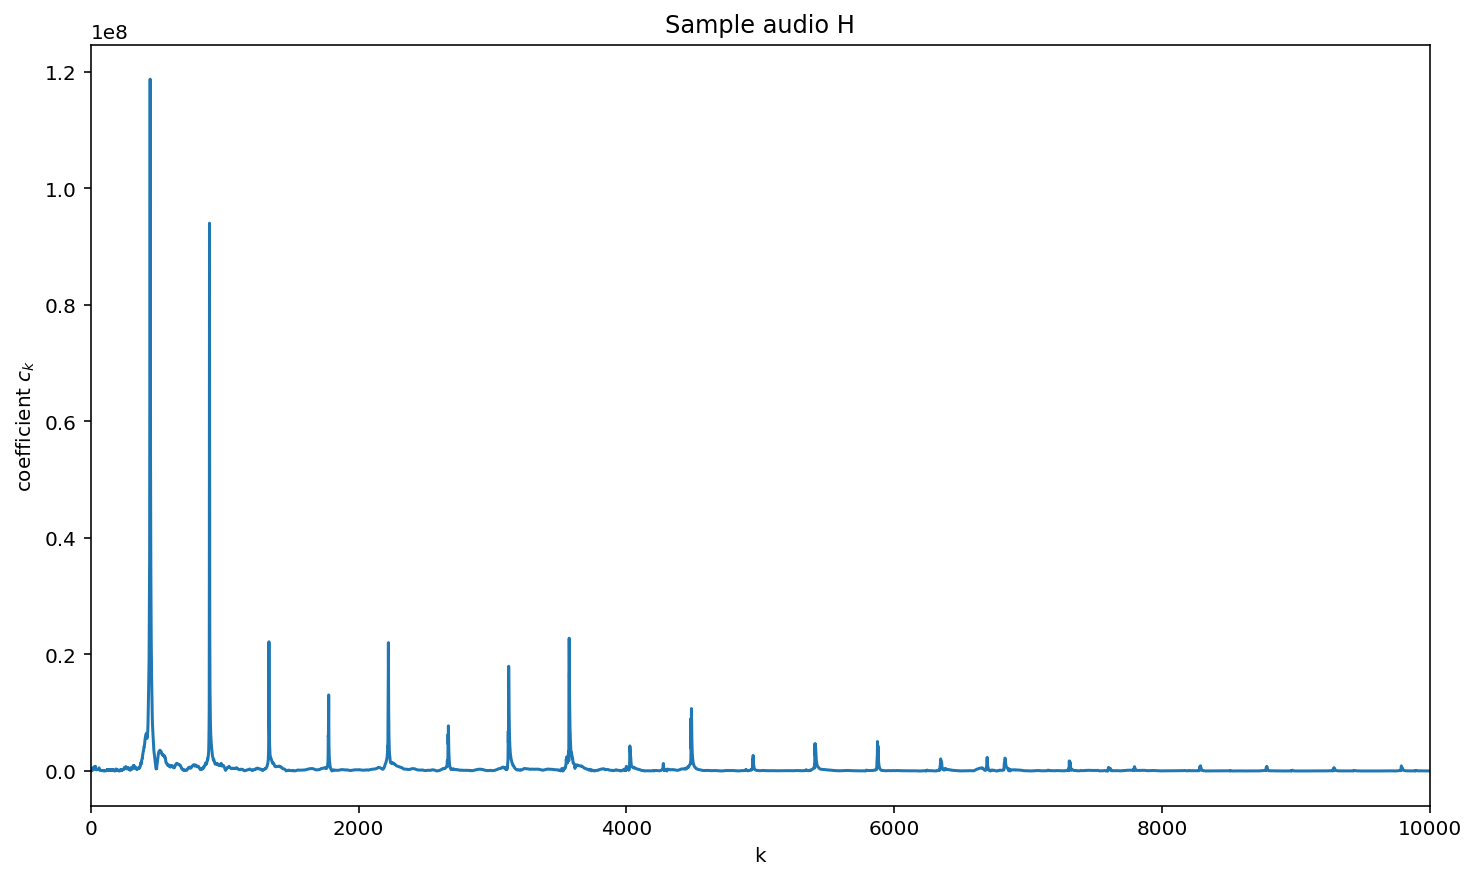

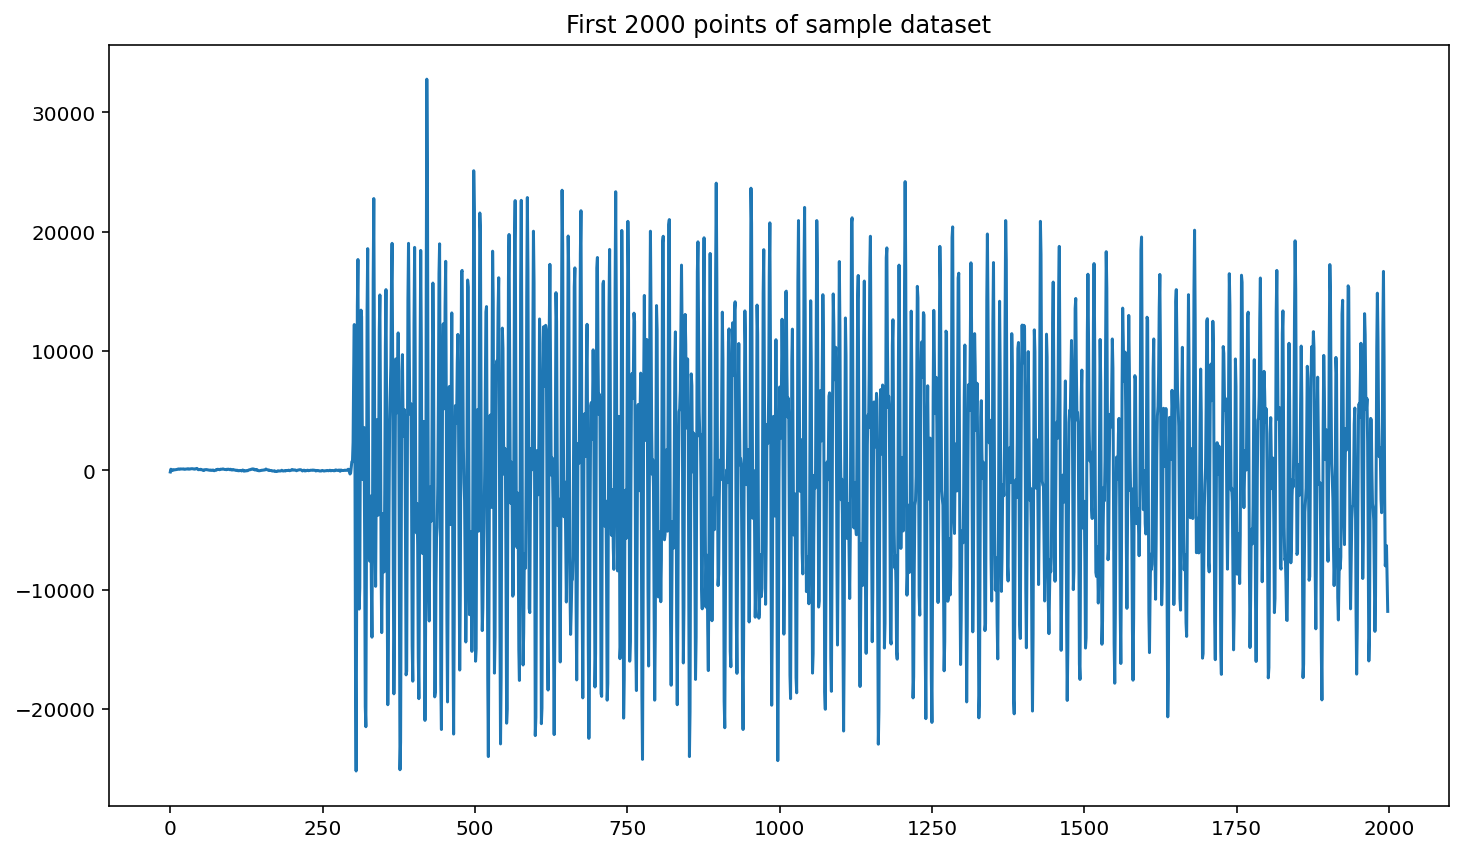

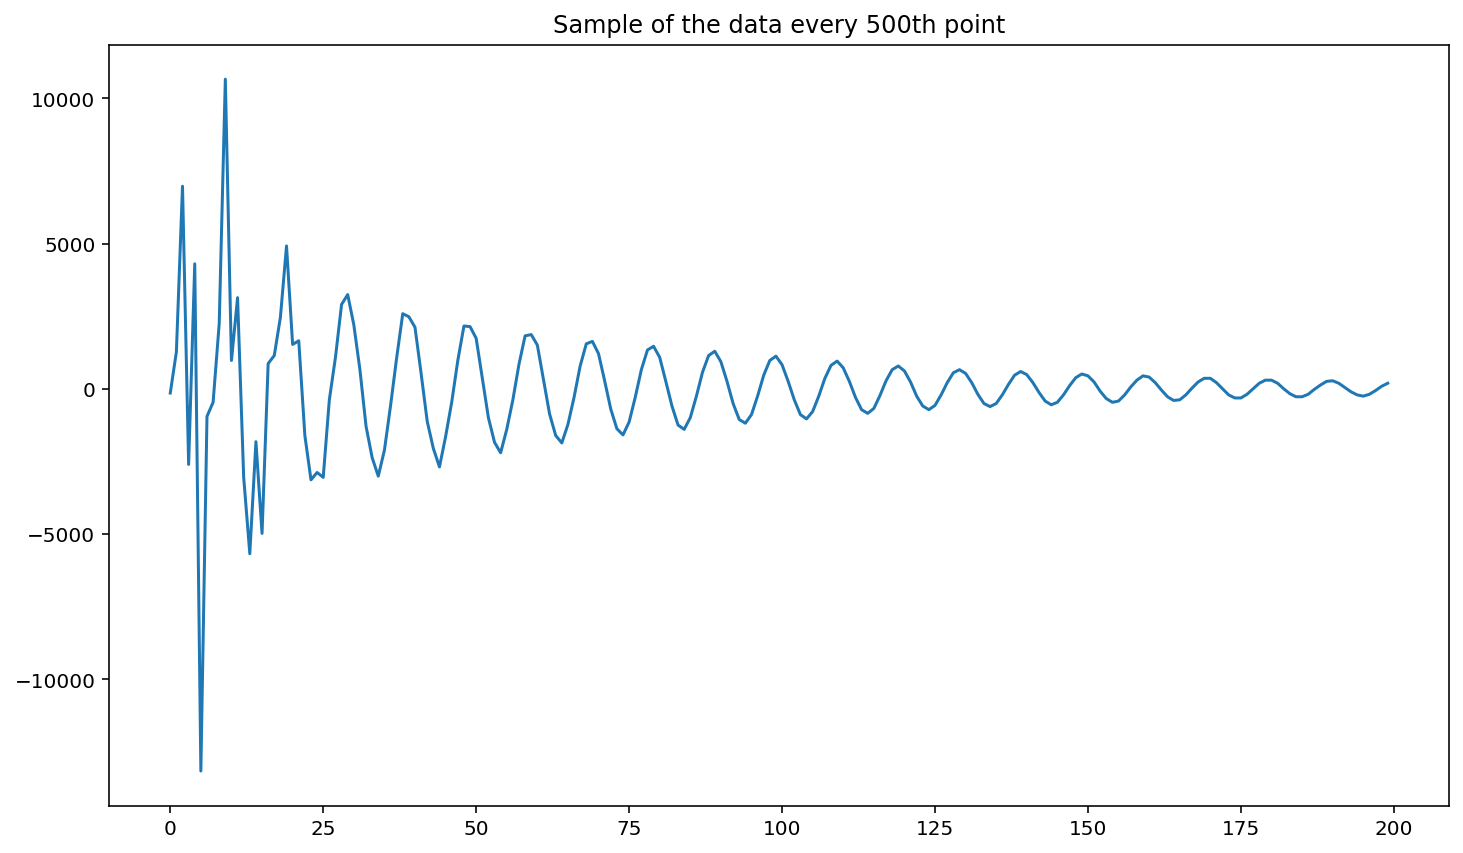

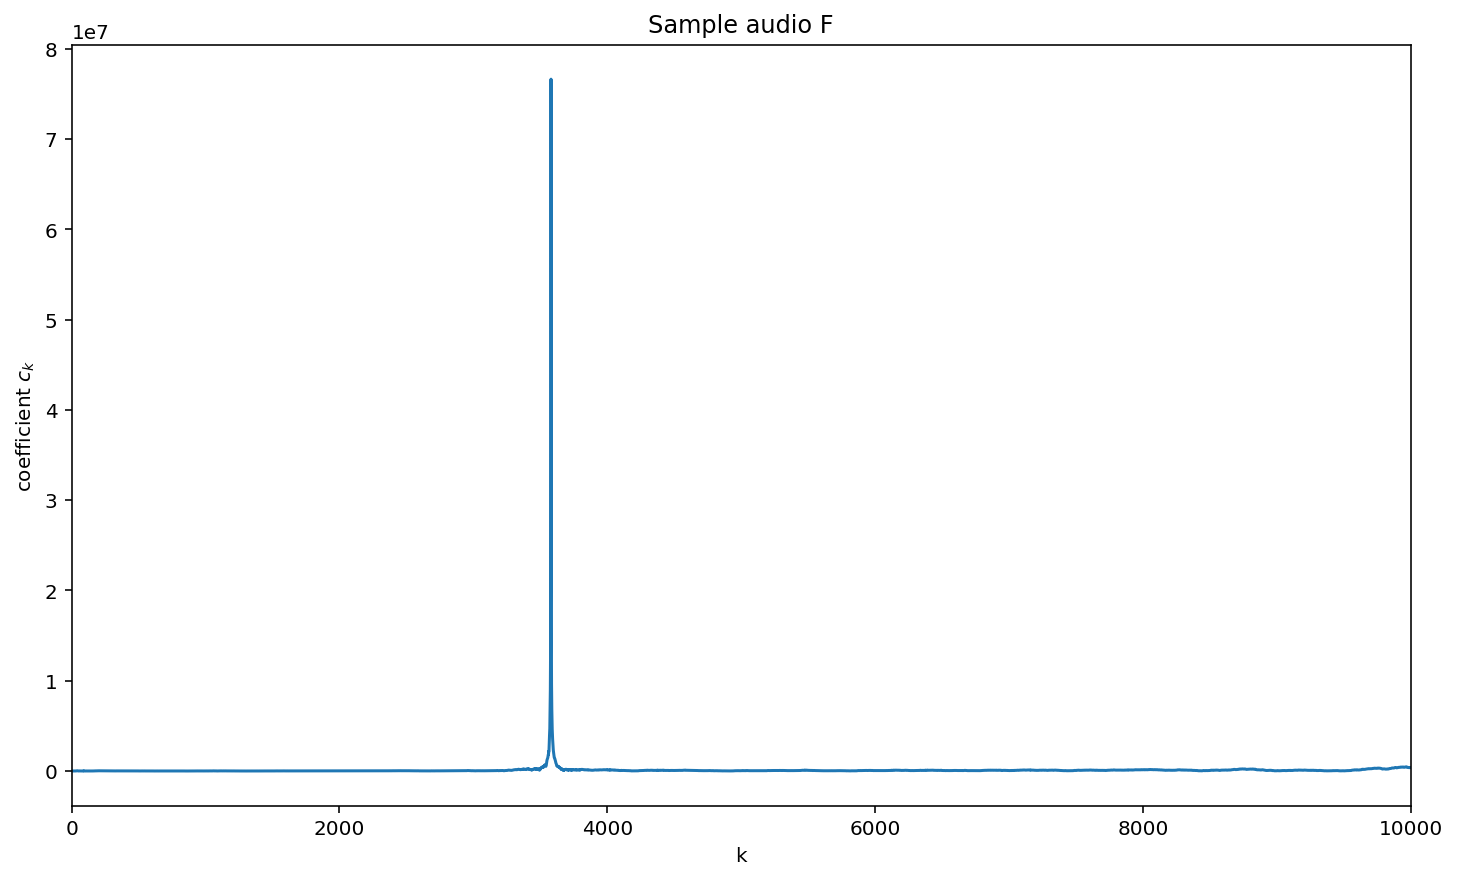

In [15]:
#analysing Sample audio H
sampleH = load_data('Sample_H.txt')
sampleH_FTcoeff = analyse(sampleH, "Sample audio H")

#analysing Sample audio F
sampleF = load_data('Sample_F.txt')
sampleF_FTcoeff = analyse(sampleF, "Sample audio F")

<b> Fundamental Fundamental Fourier coefficient index k </b>

For sample H, k $\approx$ 300 $\newline$
For sample F, k $\approx$ 3600

<b> Sensible observations for sample H </b> $\newline$
$\bullet$ the amplitude of the sample audio increases very gradually. 
This implies that the volume of the audio file also increases gradually.$\newline$
$\bullet$ the amplitude of the sample data at every 500th point decays uniformly and exponentially.

<b> Sensible observations for sample F </b> $\newline$
$\bullet$ the amplitude of the sample audio is zero for the first $\approx$ 250 points then drastically increases after that. 
This implies that the volume of the audio file increases very sharply very fast.$\newline$
$\bullet$ the amplitude of the sample data at every 500th point decays uniformly and exponentially. $\newline$
$\bullet$ the sample audio F notably has only one peak. For all other values of k the value of the FT coefficient is zero.


<div class="alert alert-success">
For no extra marks, but to earn the admiration of the demonstrators - can you guess what instrument is playing each of your three samples just from looking at the data?<br><br>
    
    
Again not for credit, but as a challenge for anyone who is interested: It is possible to reconstruct playable .wav files from the sample data, using https://docs.scipy.org/doc/scipy/reference/generated/scipy.io.wavfile.write.html
    
One may then use the embeded player to play the sound directly from the notebook like described here: https://doc.cocalc.com/jupyter.html#play-a-wav-file-in-a-jupyter-notebook
</div>

General quality of plots

General quality of code comments and docstrings

General quality of text cells